In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pickle


In [6]:
DIR = "E:/Datasets/PetImages"
CATEGORIES = ['Dog', 'Cat']
IMG_SIZE = 100

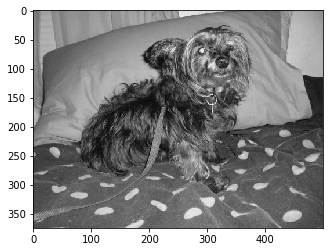

In [7]:
for category in CATEGORIES:
    path = os.path.join(DIR, category)
    for img in os.listdir(path):
        imgarray = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(imgarray, cmap='gray')
        plt.show()
        
        break
    break

In [8]:
imgarray.shape, imgarray

((375, 500),
 array([[117, 117, 119, ..., 133, 132, 132],
        [118, 117, 119, ..., 135, 134, 134],
        [119, 118, 120, ..., 137, 136, 136],
        ...,
        [ 79,  74,  73, ...,  80,  76,  73],
        [ 78,  72,  69, ...,  72,  73,  74],
        [ 74,  71,  70, ...,  75,  73,  71]], dtype=uint8))

In [33]:
trainingdata = []

def read_images():    
    for category in CATEGORIES:        
        path = os.path.join(DIR, category)
        class_num = CATEGORIES.index(category)
        
        for img in tqdm(os.listdir(path)):
            try:
                imgarray = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                newimgarray = cv2.resize(imgarray, (IMG_SIZE, IMG_SIZE))
                trainingdata.append([newimgarray, class_num])
                
            except Exception as e:
                #print(e)
                pass
    

            

In [4]:
read_images()
print(len(trainingdata))
print(trainingdata)

NameError: name 'read_images' is not defined

###  Shuffle the data to avoid overfitting or one class confusion

In [39]:
import random

In [46]:
random.shuffle(trainingdata)

In [47]:
for sample in trainingdata[:10]:
    print(sample[1])

1
0
0
1
1
1
1
1
0
0


In [48]:
X = []
y= []

for features, label in trainingdata:
    X.append(features)
    y.append(label)


In [49]:
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 25]
   [ 25]
   [ 26]
   ...
   [ 31]
   [ 29]
   [ 27]]

  [[ 25]
   [ 26]
   [ 26]
   ...
   [ 29]
   [ 28]
   [ 27]]

  [[ 26]
   [ 26]
   [ 27]
   ...
   [ 29]
   [ 29]
   [ 30]]

  ...

  [[183]
   [189]
   [186]
   ...
   [ 25]
   [ 23]
   [ 25]]

  [[181]
   [187]
   [183]
   ...
   [ 23]
   [ 23]
   [ 25]]

  [[179]
   [178]
   [175]
   ...
   [ 21]
   [ 22]
   [ 25]]]]


### Save this data to avoid reloading the data

In [50]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [4]:

pickle_in = open('X.pickle','rb')
X = pickle.load(pickle_in)